# 一、导入所需函数库

In [20]:
import pandas as pd
from snownlp import SnowNLP
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import jieba
from jieba import analyse 
import matplotlib.pyplot as plt 
import json
from wordcloud import WordCloud

# 二、导入数据-安全座椅
https://detail.tmall.com/item.htm?_u=t2dmg8j26111&id=618368232224

In [2]:
file_name = 'comments_safetyseat.csv'
data = pd.read_csv('./data/'+file_name)

# 三、查看数据基本内容

In [3]:
display(data)
#数据由评论内容组成

,content
0,挑了好久的安全座椅，最后选择了bebebus ，为颜值买单，为孩子负责。安装的时候建议找客服...
1,朋友推荐的 看了好多家最终还是选了他 值得拥有 孩子四个月体验还不错 买的经典款
2,挑了好久的安全座椅，最后选择了bebebus ，为颜值买单，为孩子负责。安装的时候建议找客服...
3,朋友推荐的 看了好多家最终还是选了他 值得拥有 孩子四个月体验还不错 买的经典款
4,对比多家还是决定选择bebebus，颜值安全性都很不错，等过两天宝宝出去体检正好可以坐了☺️
...,...
66,62天后追评：安全座椅和溜娃神器都认准bebebus\n ...
67,非常完美 孩子坐也很舒适
68,整体还不错，宝宝现在一岁7个月，之前做表弟的愿意做，所以还是买了这款，接受度还蛮高的，尿不湿...
69,0天后追评：现在出行有安全座椅老母亲也敢尝试上路了，安全第一


In [4]:
data.describe()
#评价中有7个重复项

,content
count,71
unique,63
top,此用户没有填写评价。
freq,7


In [5]:
# 查看重复项
duplicates = data.duplicated(subset=['content'])
print(data[duplicates])

                                              content
2   挑了好久的安全座椅，最后选择了bebebus ，为颜值买单，为孩子负责。安装的时候建议找客服...
3            朋友推荐的 看了好多家最终还是选了他 值得拥有 孩子四个月体验还不错 买的经典款
32                                         此用户没有填写评价。
47                                         此用户没有填写评价。
54                                         此用户没有填写评价。
56                                         此用户没有填写评价。
60                                         此用户没有填写评价。
65                                         此用户没有填写评价。


In [6]:
# 删除重复项并保留第一个出现的项
data = data.drop_duplicates()
display(data)
print('有效评论数量：', len(data))

,content
0,挑了好久的安全座椅，最后选择了bebebus ，为颜值买单，为孩子负责。安装的时候建议找客服...
1,朋友推荐的 看了好多家最终还是选了他 值得拥有 孩子四个月体验还不错 买的经典款
4,对比多家还是决定选择bebebus，颜值安全性都很不错，等过两天宝宝出去体检正好可以坐了☺️
5,都说小朋友不配合坐安全座椅，决定买这款产品还心存疑虑。好在昨天第一次带他出门全程都非常配合，...
6,选了好多个牌子，最终还是选择bebebus 原本打算是为颜值买单，谁知道宝宝坐着也很舒服，每...
...,...
66,62天后追评：安全座椅和溜娃神器都认准bebebus\n ...
67,非常完美 孩子坐也很舒适
68,整体还不错，宝宝现在一岁7个月，之前做表弟的愿意做，所以还是买了这款，接受度还蛮高的，尿不湿...
69,0天后追评：现在出行有安全座椅老母亲也敢尝试上路了，安全第一


有效评论数量： 63


In [7]:
data.describe()

,content
count,63
unique,63
top,挑了好久的安全座椅，最后选择了bebebus ，为颜值买单，为孩子负责。安装的时候建议找客服...
freq,1


# 四、情感分析

使用了 snowNLP库中的 用评论数据集预训练过的 贝叶斯分类器 做情感分析

In [8]:
data['emotion'] = data['content'].apply(lambda x:SnowNLP(x).sentiments)
display(data)

,content,emotion
0,挑了好久的安全座椅，最后选择了bebebus ，为颜值买单，为孩子负责。安装的时候建议找客服...,0.115699
1,朋友推荐的 看了好多家最终还是选了他 值得拥有 孩子四个月体验还不错 买的经典款,0.999936
4,对比多家还是决定选择bebebus，颜值安全性都很不错，等过两天宝宝出去体检正好可以坐了☺️,0.993723
5,都说小朋友不配合坐安全座椅，决定买这款产品还心存疑虑。好在昨天第一次带他出门全程都非常配合，...,0.999615
6,选了好多个牌子，最终还是选择bebebus 原本打算是为颜值买单，谁知道宝宝坐着也很舒服，每...,0.988470
...,...,...
66,62天后追评：安全座椅和溜娃神器都认准bebebus\n ...,0.991873
67,非常完美 孩子坐也很舒适,0.993781
68,整体还不错，宝宝现在一岁7个月，之前做表弟的愿意做，所以还是买了这款，接受度还蛮高的，尿不湿...,0.903884
69,0天后追评：现在出行有安全座椅老母亲也敢尝试上路了，安全第一,0.320181


In [9]:
# 保存情绪
file_name = 'emotions_safetyseat.csv'
data.to_csv('./data/'+file_name)

In [10]:
data.describe()

,emotion
count,63.000000
mean,0.854954
std,0.267564
min,0.115699
25%,0.919172
50%,0.989125
75%,0.999330
max,1.000000


emotion的均值是0.85，中位数为0.98，25%分位数为0.91，都远高于0.5。

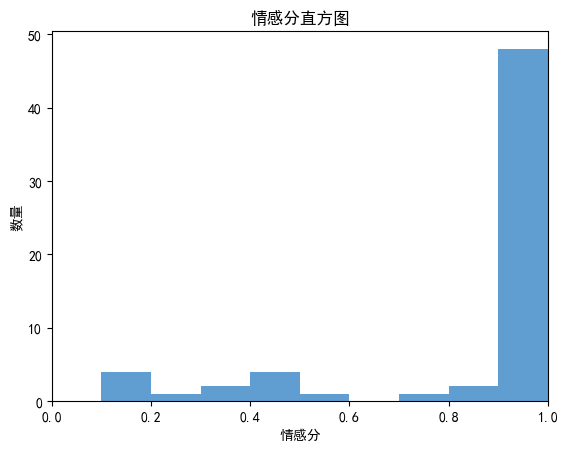

In [11]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
bins=np.arange(0,1.1,0.1)
plt.hist(data['emotion'],bins,color='#4F94CD',alpha=0.9)
plt.xlim(0,1)
plt.xlabel('情感分')
plt.ylabel('数量')
plt.title('情感分直方图')
plt.show()

由直方图可以看出，评论内容偏向极度好评，在全部的63个评论中，约有47条在[0.9,1]之间，仅有约10条处于[0,0.5]之间，0条在[0,0.1]之间。

# 五、提取关键词

使用了jieba库中的tf-idf算法提取关键词，tf-idf值越高，词的重要程度越高

In [23]:
# 定义停用词列表
stopwords = set(['天后', '追评', 'bebebus'])

text = ''
for s in data['content']:
    words = jieba.lcut(s)  # 使用jieba分词
    filtered_words = [word for word in words if word not in stopwords]  # 过滤停用词
    text += ''.join(filtered_words) + ' '  # 将过滤后的词重新组合成字符串

key_words = jieba.analyse.extract_tags(sentence=text, topK=30, withWeight=True, allowPOS=())
key_words

[('宝宝', 0.3709963302278273),
 ('颜值', 0.31635178628844013),
 ('座椅', 0.25699091354849585),
 ('安全', 0.16218837450016713),
 ('安装', 0.14935919944),
 ('舒服', 0.14683965650153202),
 ('不错', 0.11204323068259053),
 ('安全性', 0.10053106126771587),
 ('喜欢', 0.09530788417303622),
 ('非常', 0.06829084967047354),
 ('小朋友', 0.06817412108495821),
 ('结实', 0.06688181435381615),
 ('舒适', 0.06426248669874651),
 ('旋转', 0.06051295598013928),
 ('客服', 0.06037304342005571),
 ('灵活', 0.05679554506119777),
 ('不闹', 0.04995028204554318),
 ('睡觉', 0.04897425656692201),
 ('可以', 0.04881781688245126),
 ('出门', 0.04790181914275765),
 ('骨架', 0.04786857913409471),
 ('很多', 0.047364872835584965),
 ('上车', 0.04729265515387187),
 ('坐上去', 0.04676585285891365),
 ('方便', 0.04387726805550139),
 ('选择', 0.04304278576412256),
 ('品牌', 0.04202987254728412),
 ('睡着', 0.04151414071214485),
 ('不哭', 0.04051247228097493),
 ('解放', 0.03899131167309192)]

In [32]:
for i, keyword in enumerate(key_words):
    if i < len(key_words) - 1:
        print(keyword[0], end=', ')
    else:
        print(keyword[0])

宝宝, 颜值, 座椅, 安全, 安装, 舒服, 不错, 安全性, 喜欢, 非常, 小朋友, 结实, 舒适, 旋转, 客服, 灵活, 不闹, 睡觉, 可以, 出门, 骨架, 很多, 上车, 坐上去, 方便, 选择, 品牌, 睡着, 不哭, 解放


In [13]:
# 保存关键词到字典
keywords_dict = dict()
keywords_dict['all'] = key_words

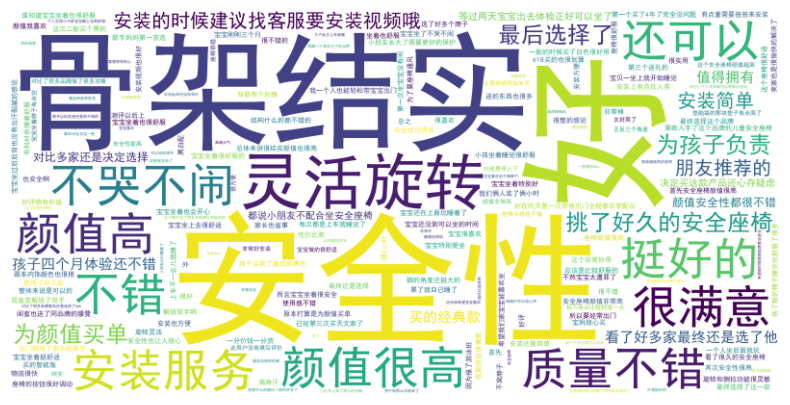

In [31]:
# 词云
# 创建词云对象
wordcloud = WordCloud(
    font_path='simhei.ttf',  # 设置字体（需要中文字体支持）
    width=800,
    height=400,
    background_color='white'  # 设置背景颜色
).generate(text)

# 显示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()

# 保存词云图片
file_name = 'wordcloud_safetyseat.png'
wordcloud.to_file('./data/'+file_name)

可以看出对于安全座椅，大家普遍关心的问题是颜值、安全性、安装、结实程度、舒适性、灵活度、旋转功能、骨架结构、是否可以让宝宝不闹/睡觉。

# 六、消极和积极评论

In [14]:
verypos_nlp = 0
littlepos_nlp = 0
littleneg_nlp = 0
veryneg_nlp = 0
for i in data['emotion']:
    if i >= 0.75:
        verypos_nlp += 1
    elif i >=0.5 and i <0.75:
        littlepos_nlp += 1
    elif i <0.5 and i >0.25:
        littleneg_nlp +=1
    else:
        veryneg_nlp += 1
print('非常积极、比较积极、比较消极、非常消极的评论数目分别为：',verypos_nlp, littlepos_nlp, littleneg_nlp, veryneg_nlp)

非常积极、比较积极、比较消极、非常消极的评论数目分别为： 51 1 7 4


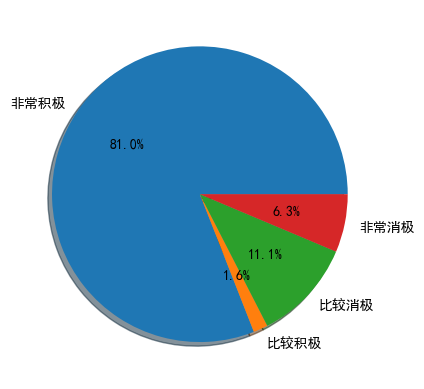

In [15]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

pie_labels='非常积极','比较积极', '比较消极', '非常消极'
plt.pie([verypos_nlp, littlepos_nlp, littleneg_nlp, veryneg_nlp],labels=pie_labels,autopct='%1.1f%%',shadow=True)

plt.show() 

对于产品少数令消费者不满意的地方，细分比较消极和非常评论，看看问题出在哪里了

In [16]:
data_neg=data[data['emotion']<0.5]
display(data_neg)

,content,emotion
0,挑了好久的安全座椅，最后选择了bebebus ，为颜值买单，为孩子负责。安装的时候建议找客服...,0.115699
10,安装上有点反人类，我们俩人装了俩小时 外，背部有个划痕，卖家也是很愉快的解决了，总之，终于买...,0.473495
25,还可以 买的智能版 为了要座椅通风 不然宝宝太遭罪了 满身汗 安装方便！好评,0.154236
29,此用户没有填写评价。,0.145428
34,太好用了,0.473478
43,昨天收到的。,0.493261
48,53天后追评：颜值没得说，小朋友出行睡着了\n 一直相...,0.331320
53,0天后追评：坐垫很舒服，宝宝一点也不抗拒,0.175614
59,宝宝安全座椅的颜值天花板了！,0.459674
69,0天后追评：现在出行有安全座椅老母亲也敢尝试上路了，安全第一,0.320181


In [19]:
# 定义停用词列表
stopwords = set(['天后', '追评', 'bebebus'])

text_neg = ''
for s in data_neg['content']:
    words = jieba.lcut(s)  # 使用jieba分词
    filtered_words = [word for word in words if word not in stopwords]  # 过滤停用词
    text_neg += ''.join(filtered_words) + ' '  # 将过滤后的词重新组合成字符串

key_words_neg = jieba.analyse.extract_tags(sentence=text_neg, topK=30, withWeight=True, allowPOS=())
key_words_neg

[('颜值', 0.4170267733569767),
 ('座椅', 0.3901046002702326),
 ('宝宝', 0.3643985842730233),
 ('安装', 0.31174391045906974),
 ('安全', 0.2579208258939535),
 ('出行', 0.18341773246348836),
 ('没得说', 0.15357593571395348),
 ('安装简单', 0.13900892445232557),
 ('人装', 0.13900892445232557),
 ('有个', 0.13900892445232557),
 ('53', 0.13900892445232557),
 ('bbs', 0.13900892445232557),
 ('一分货', 0.13900892445232557),
 ('喜欢', 0.13261833495395348),
 ('划痕', 0.12869144544069766),
 ('遭罪', 0.12869144544069766),
 ('坐垫', 0.11933827316511626),
 ('小朋友', 0.11383492776511628),
 ('太好', 0.11206974156895348),
 ('天花板', 0.1077435891133721),
 ('卖家', 0.10606458324255814),
 ('一分钱', 0.10392829095023255),
 ('填写', 0.103686872445),
 ('买单', 0.1032185712922093),
 ('满身', 0.1017811997111628),
 ('买到', 0.10131734704813954),
 ('好评', 0.10112408098720929),
 ('客服', 0.10080894226883721),
 ('好久', 0.09881395662906978),
 ('背部', 0.09734009958674418)]

In [18]:
# 保存关键词到json文件
keywords_dict['negtive'] = key_words_neg

file_name = 'keywords_safetyseat.json'
with open('./data/'+file_name, 'w', encoding='utf-8') as json_file:
    json.dump(keywords_dict, json_file, indent=4, ensure_ascii=False)

由于收集到的评论数量较少，且部分消极评论实际是积极评论，所以人工校对了emotion分数<0.5的评论和关键词。发现安装和划痕是造成用户体验不佳的原因。

发现有一部分积极评论被错误地划分为消极评论，说明在情感分析的方法上需要改进，有几种改进方法：  
1. 使用母婴类电商评论（现在使用的是通用电商评论）作为训练集，对贝叶斯分类器重新做训练；
2. 更换分类模型，如使用LDA主题模型，Bert，CRF等模型做情感分析；
3. 使用新的大语言模型+微调+提示词工程做情感分析（如LLaMA-Factory + Lora + Qwen1.5-7B https://github.com/GuoCoder/ai-app/tree/main/llm-train/comment）。